In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
dataset = pd.read_csv('student-por.csv')
print(f"✓ Data Loaded. Original Shape: {dataset.shape}")

dataset = dataset.drop(columns=['Walc', 'Dalc' , 'G2'])
print("✓ Dropped columns 'Walc' and 'Dalc and G2'.")

✓ Data Loaded. Original Shape: (649, 33)
✓ Dropped columns 'Walc' and 'Dalc and G2'.


In [3]:
initial_rows = len(dataset)
dataset = dataset[dataset['G3'] != 0]
dropped_rows = initial_rows - len(dataset)
print(f"✓ Removed {dropped_rows} rows with '0' grades (Anomalies cleaned).")

X = dataset.drop(columns=['G3'])
y = dataset['G3'].values

✓ Removed 15 rows with '0' grades (Anomalies cleaned).


In [4]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])
X_processed = preprocessor.fit_transform(X)
print("✓ Missing values imputed (SimpleImputer).")
print("✓ Categorical data encoded (OneHotEncoder).")

✓ Missing values imputed (SimpleImputer).
✓ Categorical data encoded (OneHotEncoder).


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✓ Dataset split into Train and Test sets.")

✓ Dataset split into Train and Test sets.


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("✓ Feature Scaling applied (StandardScaler).")

✓ Feature Scaling applied (StandardScaler).


In [8]:
print("\nTraining Random Forest Model...")
regressor = RandomForestRegressor(n_estimators=300, min_samples_split=5, min_samples_leaf=2, random_state=42)
regressor.fit(X_train, y_train)
print("✓ Model Training Complete.")


Training Random Forest Model...


✓ Model Training Complete.


In [9]:
print("\n--- MODEL EVALUATION ---")
y_pred = regressor.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Custom Accuracy: Percentage of predictions within ±2 points of the real grade
errors = abs(y_test - y_pred)
accuracy_custom = np.mean(errors <= 2) * 100

print(f"R-Squared Score: {r2:.4f}")
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")
print(f"Custom Accuracy (Predictions within ±2 points): {accuracy_custom:.2f}%")


--- MODEL EVALUATION ---
R-Squared Score: 0.7685
RMSE (Root Mean Square Error): 1.3775
Custom Accuracy (Predictions within ±2 points): 84.25%


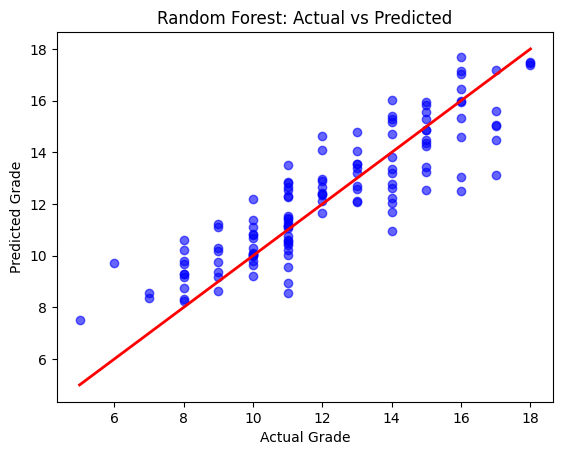

In [10]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [11]:
'''demo_features = ['failures', 'absences', 'age', 'Walc']

print(f"Top 4 Attributes Selected for Demo: {demo_features}")
print("Training simplified demo model...")

# Prepare Demo Data (Subset of original data)
# We reload clean data to just grab these 4 specific columns easily
df_demo = pd.read_csv('student-por.csv')
df_demo = df_demo[df_demo['G3'] != 0] # Apply same cleaning
X_demo = df_demo[demo_features].values
y_demo = df_demo['G3'].values

# Train Demo Model
demo_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
demo_regressor.fit(X_demo, y_demo)

print("✓ Demo Model Ready.\n")

# Interactive Loop
while True:
    print("Please enter student details (or type 'exit' to stop):")
    try:
        f_val = input(f"1. Failures (0-3): ")
        if f_val.lower() == 'exit': break
        
        a_val = input(f"2. Absences (0-93): ")
        age_val = input(f"3. Age (15-22): ")
        w_val = input(f"4. Weekend Alcohol (1-5): ")
        
        # Convert inputs
        input_data = np.array([[float(f_val), float(a_val), float(age_val), float(w_val)]])
        
        # Predict
        prediction = demo_regressor.predict(input_data)
        grade = prediction[0]
        
        print(f"\n>>> PREDICTED GRADE: {grade:.2f} / 20")
        if grade >= 10:
            print(">>> STATUS: PASS ✅\n")
        else:
            print(">>> STATUS: FAIL ❌\n")
            
    except ValueError:
        print("\n[!] Invalid input. Please enter numbers only.\n")'''

Top 4 Attributes Selected for Demo: ['failures', 'absences', 'age', 'Walc']
Training simplified demo model...
✓ Demo Model Ready.

Please enter student details (or type 'exit' to stop):
